<a href="https://colab.research.google.com/github/GeorgeOgeorge/hltv_datamining_analisys/blob/master/analise_explanatoria_hltv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/

Mounted at /content/drive/
/content/drive/MyDrive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
from IPython.display import Image
from wordcloud import WordCloud, STOPWORDS

Carregando o arquvio contendo os dados com todos os jogadores e convertendo para o formato dataframe

In [ ]:
df = pd.read_csv("players_score.csv")

Fazendo a análise das colunas numericas do dataframe

In [ ]:
df.describe()

,total_kills,headshot_%,total_deaths,kills/deaths,damage/round,grenade_dmg/round,maps_played,rounds_played,kills/round,assists/round,deaths/round,saved_by_teammate/round,saved_teammates/round,rating
count,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000
mean,14833.014013,45.367516,14254.365605,1.035656,75.181783,4.031720,816.202548,21429.670064,0.689223,0.131516,0.667580,0.095962,0.096701,1.034064
std,7407.367658,8.396196,6887.648917,0.091780,4.283563,1.181943,395.112618,10410.022536,0.045034,0.017688,0.029735,0.011254,0.013332,0.073732
min,5517.000000,23.600000,5913.000000,0.740000,48.500000,1.400000,367.000000,9364.000000,0.520000,0.080000,0.530000,0.040000,0.060000,0.770000
25%,8755.000000,40.400000,8729.000000,0.980000,72.500000,3.200000,491.000000,12857.000000,0.660000,0.120000,0.650000,0.090000,0.090000,0.990000
50%,12779.000000,47.100000,12392.000000,1.030000,75.100000,3.900000,722.000000,18783.000000,0.690000,0.130000,0.670000,0.100000,0.100000,1.030000
75%,18853.000000,51.400000,17803.000000,1.100000,77.900000,4.800000,1037.000000,27181.000000,0.720000,0.140000,0.690000,0.100000,0.110000,1.080000
max,39496.000000,69.100000,37672.000000,1.440000,91.700000,9.100000,2120.000000,55651.000000,0.860000,0.180000,0.750000,0.140000,0.160000,1.330000


Fazendo a  análise das colunas categoricas do dataframe

In [ ]:
df.describe(include='object')

,nickname,name,nationality,team
count,785,785,785,785
unique,783,785,54,174
top,steel,David Danielyan,United States,No team
freq,2,1,81,309


Exibindo os times não repetidos contidos do dataframe

In [ ]:
df['team'].unique()

array(['Vitality', 'Natus Vincere', 'Gambit', 'ViCi', 'LookingForOrg',
       'Spirit', 'fnatic', 'MOUZ', 'Eternal Fire', 'Run or Die', 'NIP',
       '00Nation', 'EXTREMUM', 'G2', 'NKT', 'Renegades', 'FURIA',
       'Astralis', 'No team', 'Nexus', 'Virtus.pro', 'Entropiq',
       'MOUZ NXT', 'OG', 'NSN', 'K23', 'HellRaisers', 'SKADE', 'Paradox',
       'FaZe', 'SINNERS', 'Liquid', 'Singularity', 'Evil Geniuses',
       'Dignitas', 'Orgless', 'forZe', 'LZ', 'ENCE', 'Apeks', 'Nemiga',
       'Extra Salt', 'GODSENT', 'BIG', 'Party Astronauts',
       'FunPlus Phoenix', 'Wings Up', 'paiN', 'Isurus', 'MIBR', 'TYLOO',
       'Last Dance', 'TCG', 'GamerS1337', 'GORILLAZ', 'Savage', 'Furious',
       'ex-Ambush', '4glory', 'MAD Lions', 'VERTEX', 'Sprout', 'LDLC',
       'ORDER', 'Endpoint', 'Complexity', 'Los Reyes', "spray'n'pray",
       'CAMO', 'MANS NOT HOT', 'Copenhagen Flames', "Let's Quit",
       'Finest', 'LPSP', 'Wisla Krakow', 'Invictus', 'Anonymo', 'Heroic',
       'Golden Knights'

Exibindo a quantidade de jogadores por paises(primeiros 20)

In [ ]:
df['nationality'].value_counts().head(20)

United States    81
Denmark          67
Russia           63
Brazil           58
Poland           53
Sweden           50
Australia        43
China            27
Finland          26
France           25
Germany          25
Canada           24
Bulgaria         23
Ukraine          23
Kazakhstan       13
Thailand         12
Norway           12
Serbia           10
Spain             9
Belarus           9
Name: nationality, dtype: int64

Porcentagem dos 5 paises com mais jogadores

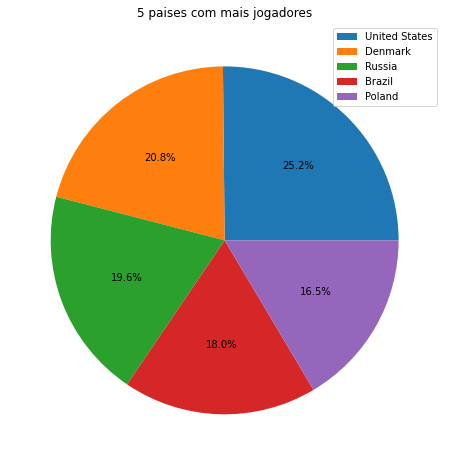

In [ ]:
dados = df['nationality'].value_counts().head(5)
legenda = dados.index

fig, ax = plt.subplots(figsize = (8,8)) 
ax = plt.pie(dados, autopct='%1.1f%%')
plt.title('5 paises com mais jogadores')
plt.legend(legenda,loc= 'upper right')
plt.show()

Exibindo os quartis assim como os maiores e média referentes ao rating de cada jogador

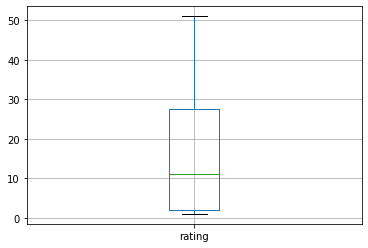

In [ ]:
 df['rating'].value_counts().plot.box(grid = True)

Distribuição de algumas colunas do dataframe



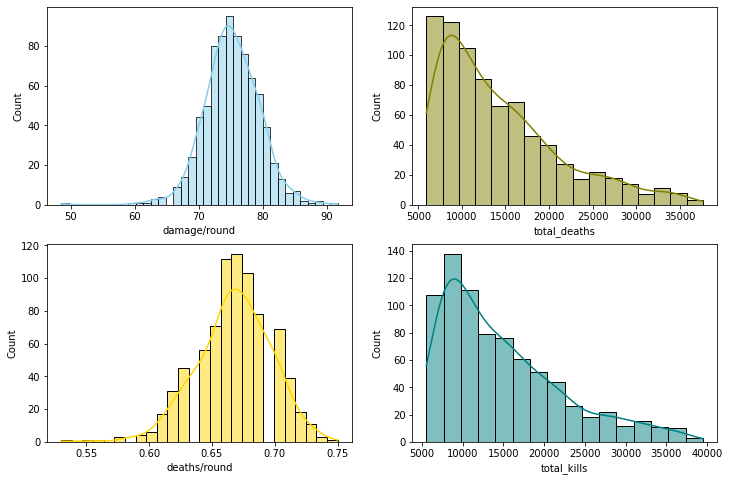

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

sb.histplot(data=df, x='damage/round', kde=True, color="skyblue", ax=axs[0, 0])
sb.histplot(data=df, x='total_deaths', kde=True, color="olive", ax=axs[0, 1])
sb.histplot(data=df, x='deaths/round', kde=True, color="gold", ax=axs[1, 0])
sb.histplot(data=df, x='total_kills', kde=True, color="teal", ax=axs[1, 1])
			
plt.show()

Muita coorelação entre Rating e abates por round

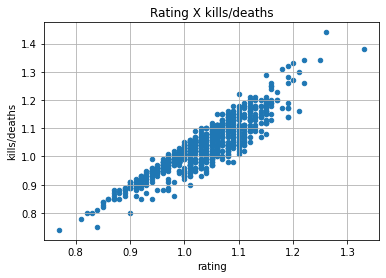

In [ ]:
df.plot.scatter(x='rating',y='kills/deaths', title = 'Rating X kills/deaths', grid = True)

Pouca correlação(negativa) entre Rating dos jogadores e mortes por round

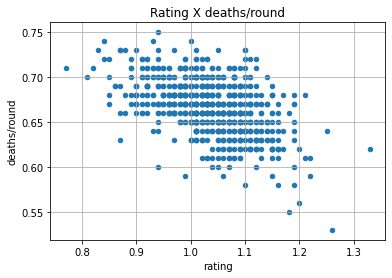

In [ ]:
df.plot.scatter(x='rating',y='deaths/round', title = 'Rating X deaths/round', grid = True)

Coorelação entre colunas do dataframe

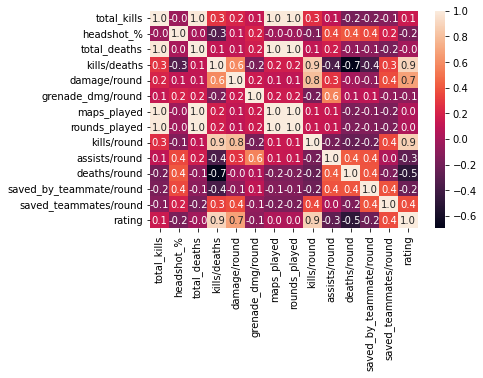

In [ ]:
corr = df.select_dtypes(exclude='object').corr()
sb.heatmap(corr, annot=True, fmt=".1f") 